In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('cleaned_scripts_and_titles.csv', index_col=0)

In [3]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [4]:
test_string = df['scripts'][21]

In [5]:
# re.sub("Previous transcript:\n Next transcript:\n\n\n [\w\s:\n]+\n\n\s+\n", '', test_string)
# re.sub("This transcript is not finished!This page does not have the entire transcript.It is recommended to add the complete transcript.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.     \n\n\n\n ", '', test_string)
test_string

'This transcript isn\'t tidy!This page\'s transcript is incomplete for the following reason(s): scrolling is too long, not all quotes are labeledRemove this template once any and all issues are resolved.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.\n\n\n\n Previous transcript:\n Next transcript:\n\n\n\n The Incredible Hulk\n\n     \nTony Stark: I feel like you\'re driving me to a court-martial. This is crazy. What did I do? I feel like you\'re going to pull over and snuff me. What, you\'re not allowed to talk? Hey, Forrest!\nSoldier: We can talk, sir.\nTony Stark: Oh, I see. So it\'s personal?\nSoldier (female): [She\'s driving the Vehicle.] No, you intimidate them.\nTony Stark: Good God, you\'re a woman. I honestly... I couldn\'t have called that. I mean, I\'d apologize, but isn\'t that what we\'re going for here? I thought of you as a soldier first.\nSoldier (female): I\'m an airman.\nTony Stark: Well you have, actually, excellent bone structure, there. 

In [6]:
re.sub("This article is a stub. You can help Transcripts Wiki by  expanding it.", '', test_string)

'This transcript isn\'t tidy!This page\'s transcript is incomplete for the following reason(s): scrolling is too long, not all quotes are labeledRemove this template once any and all issues are resolved.\n\n\n\n\n\n Previous transcript:\n Next transcript:\n\n\n\n The Incredible Hulk\n\n     \nTony Stark: I feel like you\'re driving me to a court-martial. This is crazy. What did I do? I feel like you\'re going to pull over and snuff me. What, you\'re not allowed to talk? Hey, Forrest!\nSoldier: We can talk, sir.\nTony Stark: Oh, I see. So it\'s personal?\nSoldier (female): [She\'s driving the Vehicle.] No, you intimidate them.\nTony Stark: Good God, you\'re a woman. I honestly... I couldn\'t have called that. I mean, I\'d apologize, but isn\'t that what we\'re going for here? I thought of you as a soldier first.\nSoldier (female): I\'m an airman.\nTony Stark: Well you have, actually, excellent bone structure, there. I\'m kind of having a hard time not looking at you now. Is that weird? 

In [7]:
junk_strings = ["Previous transcript:\n Next transcript:\n\n\n[\w\s:\n\-\(\)\d.]+\n\s+?\n", 
                "This transcript is not finished!This page does not have the entire transcript.It is recommended to add the complete transcript.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.     \n\n\n\n ",
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\): Unfixed/Messed Remove this template once any and all issues are resolved.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.",
                "Warning This Article contains information marked as Mature. In other words, it will have an adult theme and contain scenes and storylines which are unsuitable for readers under 18 years of age. The content on this page is likely to contain: Sex, Language, Drugs, Alcohol, Nudity, Violence & Cursing.\n\n\n\n\n ",
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):Unfixed/MessedRemove this template once any and all issues are resolved.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.",
                "Previous transcript:\n Next transcript:\n\n\n\n Blade II\n\n\n\nThis transcript isn\'t tidy!This page\'s transcript is incomplete for the following reason\(s\):Unfixed/Messed & incorrect actionsRemove this template once any and all issues are resolved.\n\n",
                "Warning This Article contains information marked as Mature. In other words, it will have an adult theme and contain scenes and storylines which are unsuitable for readers under 18 years of age. The content on this page is likely to contain: Sex, Language, Drugs, Alcohol, Nudity, Violence & Cursing.\n\n     \n\n\n ",
                "This article is a stub. You can help Transcripts Wiki by  expanding it."
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):unfixed/messedRemove this template once any and all issues are resolved.",
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):Unfixed/Messed & incorrect actionsRemove this template once any and all issues are resolved.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.\n\nCorrect transcripts: https://www.springfieldspringfield.co.uk/movie_script.php?movie=blade-trinity\n\n     \n",
                "\[incomplete: not enough\]\n     \nThis article is a stub. You can help Transcripts Wiki by  expanding it.",
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):unfixed/messedRemove this template once any and all issues are resolved.\n\n",
                "Previous transcript:\n Next transcript:\n\n\n[\w\s:\n\-\(\)\d.]+\n\n", 
                "Previous transcript:\n Next transcript:"
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):Unfixed/Messed & incorrect actionsRemove this template once any and all issues are resolved.",
                "This transcript isn't tidy!This page's transcript is incomplete for the following reason\(s\):Unfixed/Messed & incorrect actionsRemove this template once any and all issues are resolved.\n\nThis article is a stub. You can help Transcripts Wiki by  expanding it.\n\nCorrect transcripts: https://www.springfieldspringfield.co.uk/movie_script.php?movie=blade-trinity\n\n     \n",
                "This transcript isn't tidy!",
                "This article is a stub. You can help Transcripts Wiki by  expanding it.",
                "This page's transcript is incomplete for the following reason\(s\):No actionsRemove this template once any and all issues are resolved.",
                "This transcript is not finished!This page does not have the entire transcript.It is recommended to add the complete transcript.\n\n\n\n\n\n",
                "This page's transcript is incomplete for the following reason\(s\): scrolling is too long, not all quotes are labeledRemove this template once any and all issues are resolved."]



In [8]:
for sub in junk_strings:
    df['scripts'] = df['scripts'].str.replace(sub, '')
    df['scripts'] = df['scripts'].str.lstrip()
    df['scripts'] = df['scripts'].str.rstrip()
    
df

scripts  \
0   Oscorp Lab - Richard Parker is frantically del...   
1   [1989 – Hank Pym enters a SHIELD facility and ...   
2   Hank: [voiceover] I still think about the nigh...   
3   "And there came a day, a day unlike any other,...   
4   [scrolling is too long]\n\n\nAnnouncer: [first...   
5   (The screen first panels up to an arrow being ...   
6   [Marvel Opening Credits]\n[Radio transmission ...   
7   Written by \n\n                Ryan Coogler & ...   
8   This page's transcript is incomplete for the f...   
9   This is the transcript for "Blade II".\n\nTran...   
10  This page's transcript is incomplete for the f...   
11  [1991, a HYDRA base in a snowy landscape. A ma...   
12  Captain America: The Winter Soldier\n\n[first ...   
13  Captain America: The First Avenger\n Captain A...   
14  [Marvel Studios Opening Sequence begins but in...   
15  [incomplete: unfixed/messed & scrolling is too...   
16  [first lines]\nDeadpool: [voice over] Fuck Wol...   
17  [scene at the temple, sound of bell ringing. S...   
18  This page's transcript is incomplete for the f...   
19  [Missouri, Earth, 1980. Meredith Quill & Ego a...   
20  [Adrian Toomes and his coworker, Phineas Mason...   
21  Tony Stark: I feel like you're driving me to a...   
22  [scrolling is too long]\n\nTony (V.O.): Been a...   
23  [Scrolling is too long]\nThis is the transcrip...   
24  Reporter: King T'Challa, do you intended to go...   
25  Woman: We must transfer this key token to our ...   
26  (At Space)\nGalactus: I’m still hungry! I need...   
27  Previous transcript:\n Next transcript:\n\n\n ...   
28  Black Widow: So, this is the surprise party. B...   
29  S.H.I.E.L.D Sentry #1: Huh?\nDoctor Octopus: S...   
..                                                ...   
34  S.H.I.E.L.D. Soldier: Holy moly! I think we're...   
35  Iron Man: This orbit style outlet is the only ...   
36  Nick Fury: All right, that should do it. Won't...   
37  [The scene begins at the S.H.I.E.L.D. Helicarr...   
38  Gamora: I thought you said you could outrun th...   
39  Peter (Voiceover): Who am I? You sure you want...   
40  Spider-Man/Peter Parker: It's me, Peter Parker...   
41  Spider-Man: Alright, Gobby. You know the drill...   
42  (Present Day)\nSpider-Man: Eddie! Eddie Brock,...   
43  [The Columbia Pictures logo plays normally. At...   
44  New Goblin: Spidey, what's happening?\n\n\nBla...   
45  [first lines]\nPeter Parker / Spider-Man [narr...   
46  Contents[show]\nOpening\n(In the opening cinem...   
47  [movie opens with a 4 year-old Peter Parker pl...   
48  [SHORT VERSION - IF scrolling is too long]\n  ...   
49  The Twilight Saga: Eclipse\n The Twilight Saga...   
50  The Twilight Saga: Breaking Dawn – Part 1\n N/...   
51  The Twilight Saga: New Moon\n The Twilight Sag...   
52  CREDITS OVER:\nA FULL MOON FILLS THE FRAME -- ...   
53  On the blackness of SPACE, beautiful and myste...   
54  1    OMITTED                                  ...   
55  Odin: [voice over] Long before the birth of li...   
56  SHOOTING DRAFT\n                              ...   
57  [August 9th, 1945, Nagasaki, Japan - at the PO...   
58  X-Men\nBy Ed Solomon\nRevisions:\nChris McQuar...   
59  X-MEN ORIGINS: WOLVERINE \n\n\n\n             ...   
60  Charles: Mutants, born with extraordinary abil...   
61  [New York - mutants and the humans have been g...   
62  (Auschwitz, Poland 1942)\n(Nazis are herding J...   
63  Eric: I still don't know why I'm here.\nCouldn...   

                                               titles    Universe  MCU  
0                            The Amazing Spider-Man 2  Spider-man    0  
1                                             Ant-Man         MCU    1  
2                                Ant-Man and the Wasp         MCU    1  
3                                        The Avengers         MCU    1  
4                             Avengers: Age of Ultron         MCU    1  
5                                   Avengers: Endgame         MCU    1  


In [9]:
stop_words = set(stopwords.words('english'))
stop_words = ' '.join(stop_words)
stop_words = word_tokenize(stop_words)
stop_words

['here',
 'had',
 'but',
 'from',
 'were',
 'm',
 'your',
 'o',
 'down',
 'any',
 'won',
 'what',
 'off',
 'must',
 "n't",
 'having',
 'you',
 "'d",
 'should',
 "n't",
 'while',
 'too',
 'is',
 "n't",
 'again',
 'had',
 "n't",
 'doesn',
 'ma',
 'are',
 'you',
 "'re",
 'mustn',
 'of',
 'yourself',
 'when',
 'these',
 'shouldn',
 'you',
 'my',
 'we',
 'than',
 'did',
 'just',
 'both',
 'you',
 "'ve",
 'need',
 "n't",
 'same',
 'do',
 "n't",
 'weren',
 'his',
 'myself',
 'once',
 'don',
 'has',
 "n't",
 'could',
 "n't",
 'further',
 'under',
 'might',
 "n't",
 'ourselves',
 'our',
 'their',
 'himself',
 'no',
 'up',
 'over',
 'do',
 're',
 'all',
 'until',
 'that',
 'are',
 "n't",
 'wasn',
 'there',
 'needn',
 'an',
 'other',
 'hasn',
 'should',
 'then',
 'wouldn',
 'not',
 'because',
 'aren',
 'some',
 'itself',
 'couldn',
 'why',
 'was',
 "n't",
 'out',
 'below',
 'or',
 'i',
 'only',
 'its',
 'didn',
 'on',
 'before',
 'how',
 'it',
 "'s",
 'ain',
 'into',
 'is',
 'themselves',
 'she',

In [10]:
misc = ["'", "...", "--", "’", "\'m"]

In [11]:
df['scripts_no_stopwords'] = df['scripts'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in (stop_words) and word not in string.punctuation and word not in misc]))


In [12]:
df

scripts  \
0   Oscorp Lab - Richard Parker is frantically del...   
1   [1989 – Hank Pym enters a SHIELD facility and ...   
2   Hank: [voiceover] I still think about the nigh...   
3   "And there came a day, a day unlike any other,...   
4   [scrolling is too long]\n\n\nAnnouncer: [first...   
5   (The screen first panels up to an arrow being ...   
6   [Marvel Opening Credits]\n[Radio transmission ...   
7   Written by \n\n                Ryan Coogler & ...   
8   This page's transcript is incomplete for the f...   
9   This is the transcript for "Blade II".\n\nTran...   
10  This page's transcript is incomplete for the f...   
11  [1991, a HYDRA base in a snowy landscape. A ma...   
12  Captain America: The Winter Soldier\n\n[first ...   
13  Captain America: The First Avenger\n Captain A...   
14  [Marvel Studios Opening Sequence begins but in...   
15  [incomplete: unfixed/messed & scrolling is too...   
16  [first lines]\nDeadpool: [voice over] Fuck Wol...   
17  [scene at the temple, sound of bell ringing. S...   
18  This page's transcript is incomplete for the f...   
19  [Missouri, Earth, 1980. Meredith Quill & Ego a...   
20  [Adrian Toomes and his coworker, Phineas Mason...   
21  Tony Stark: I feel like you're driving me to a...   
22  [scrolling is too long]\n\nTony (V.O.): Been a...   
23  [Scrolling is too long]\nThis is the transcrip...   
24  Reporter: King T'Challa, do you intended to go...   
25  Woman: We must transfer this key token to our ...   
26  (At Space)\nGalactus: I’m still hungry! I need...   
27  Previous transcript:\n Next transcript:\n\n\n ...   
28  Black Widow: So, this is the surprise party. B...   
29  S.H.I.E.L.D Sentry #1: Huh?\nDoctor Octopus: S...   
..                                                ...   
34  S.H.I.E.L.D. Soldier: Holy moly! I think we're...   
35  Iron Man: This orbit style outlet is the only ...   
36  Nick Fury: All right, that should do it. Won't...   
37  [The scene begins at the S.H.I.E.L.D. Helicarr...   
38  Gamora: I thought you said you could outrun th...   
39  Peter (Voiceover): Who am I? You sure you want...   
40  Spider-Man/Peter Parker: It's me, Peter Parker...   
41  Spider-Man: Alright, Gobby. You know the drill...   
42  (Present Day)\nSpider-Man: Eddie! Eddie Brock,...   
43  [The Columbia Pictures logo plays normally. At...   
44  New Goblin: Spidey, what's happening?\n\n\nBla...   
45  [first lines]\nPeter Parker / Spider-Man [narr...   
46  Contents[show]\nOpening\n(In the opening cinem...   
47  [movie opens with a 4 year-old Peter Parker pl...   
48  [SHORT VERSION - IF scrolling is too long]\n  ...   
49  The Twilight Saga: Eclipse\n The Twilight Saga...   
50  The Twilight Saga: Breaking Dawn – Part 1\n N/...   
51  The Twilight Saga: New Moon\n The Twilight Sag...   
52  CREDITS OVER:\nA FULL MOON FILLS THE FRAME -- ...   
53  On the blackness of SPACE, beautiful and myste...   
54  1    OMITTED                                  ...   
55  Odin: [voice over] Long before the birth of li...   
56  SHOOTING DRAFT\n                              ...   
57  [August 9th, 1945, Nagasaki, Japan - at the PO...   
58  X-Men\nBy Ed Solomon\nRevisions:\nChris McQuar...   
59  X-MEN ORIGINS: WOLVERINE \n\n\n\n             ...   
60  Charles: Mutants, born with extraordinary abil...   
61  [New York - mutants and the humans have been g...   
62  (Auschwitz, Poland 1942)\n(Nazis are herding J...   
63  Eric: I still don't know why I'm here.\nCouldn...   

                                               titles    Universe  MCU  \
0                            The Amazing Spider-Man 2  Spider-man    0   
1                                             Ant-Man         MCU    1   
2                                Ant-Man and the Wasp         MCU    1   
3                                        The Avengers         MCU    1   
4                             Avengers: Age of Ultron         MCU    1   
5                                   Avengers: Endgame         MCU  

In [13]:
import gensim
from gensim import corpora, models

In [14]:
doc_set = [nltk.word_tokenize(script) for script in df['scripts_no_stopwords']]

In [15]:
dictionary = corpora.Dictionary(doc_set)
corpus = [dictionary.doc2bow(doc) for doc in doc_set]

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=50)

In [17]:
print(lda_model.print_topics(num_topics=20, num_words=5))

[(0, '0.033*"quill" + 0.031*"peter" + 0.026*"rocket" + 0.025*"gamora" + 0.017*"drax"'), (1, '0.034*"logan" + 0.016*"stryker" + 0.010*"creed" + 0.010*"kayla" + 0.007*"cont"'), (2, '0.012*"get" + 0.011*"iron" + 0.010*"man" + 0.010*"spider-man" + 0.010*"captain"'), (3, '0.034*"peter" + 0.018*"steve" + 0.011*"tony" + 0.010*"rogers" + 0.009*"stark"'), (4, '0.000*"thor" + 0.000*"tony" + 0.000*"peter" + 0.000*"back" + 0.000*"bella"'), (5, '0.038*"tony" + 0.021*"stark" + 0.013*"deadpool" + 0.012*"pepper" + 0.010*"wade"'), (6, '0.000*"thor" + 0.000*"like" + 0.000*"back" + 0.000*"know" + 0.000*"man"'), (7, '0.018*"ghost-spider" + 0.015*"mimi" + 0.012*"squirrel" + 0.011*"girl" + 0.010*"secret"'), (8, '0.037*"blade" + 0.011*"whistler" + 0.008*"karen" + 0.008*"back" + 0.008*"night"'), (9, '0.000*"peter" + 0.000*"bella" + 0.000*"parker" + 0.000*"know" + 0.000*"gwen"'), (10, '0.036*"thor" + 0.022*"jane" + 0.019*"loki" + 0.010*"odin" + 0.009*"darcy"'), (11, '0.047*"bella" + 0.024*"edward" + 0.014*"jac

In [18]:
# document_topics = [lda_model.get_document_topics(item) for item in corpus]

In [19]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

In [20]:
all_topics_df

0         1         2         3         4         5         6   \
0   0.000005  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   
1   0.000006  0.000006  0.005069  0.029947  0.000006  0.000006  0.000006   
2   0.000008  0.000008  0.038322  0.000008  0.000008  0.000008  0.000008   
3   0.000004  0.000004  0.000621  0.056501  0.000004  0.002467  0.000004   
4   0.000006  0.000006  0.037017  0.728435  0.000006  0.000006  0.000006   
5   0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004   
6   0.055108  0.000004  0.327205  0.112365  0.000004  0.000004  0.000004   
7   0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004   
8   0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004   
9   0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003   
10  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003   
11  0.000004  0.000004  0.000004  0.999913  0.000004  0.000004  0.000004   
12  0.000007  0.000007  0.000007  0.000007  0.000007  0.000007  0.000007   
13  0.000005  0.000005  0.000005  0.992078  0.000005  0.000005  0.000005   
14  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006  0.000006   
15  0.000003  0.000003  0.000003  0.000003  0.000003  0.987336  0.000003   
16  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010   
17  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010  0.000010   
18  0.999856  0.000008  0.000008  0.000008  0.000008  0.000008  0.000008   
19  0.858021  0.000009  0.141754  0.000009  0.000009  0.000009  0.000009   
20  0.000003  0.000003  0.000003  0.999942  0.000003  0.000003  0.000003   
21  0.000007  0.000007  0.000007  0.000007  0.000007  0.999872  0.000007   
22  0.000006  0.000006  0.000006  0.000006  0.000006  0.995398  0.000006   
23  0.000005  0.000005  0.000005  0.000005  0.000005  0.999904  0.000005   
24  0.000079  0.000079  0.588266  0.000079  0.000079  0.000079  0.000079   
25  0.000032  0.000032  0.000032  0.000032  0.000032  0.000032  0.000032   
26  0.000007  0.000007  0.498440  0.000007  0.000007  0.000007  0.000007   
27  0.005232  0.000003  0.994715  0.000003  0.000003  0.000003  0.000003   
28  0.000105  0.000105  0.731876  0.266238  0.000105  0.000105  0.000105   
29  0.000031  0.022471  0.555189  0.000031  0.000031  0.053186  0.000031   
..       ...       ...       ...       ...       ...       ...       ...   
34  0.000026  0.210936  0.788603  0.000026  0.000026  0.000026  0.000026   
35  0.000009  0.000009  0.999825  0.000009  0.000009  0.000009  0.000009   
36  0.000004  0.000004  0.980722  0.000457  0.000004  0.018598  0.000004   
37  0.000064  0.000064  0.429997  0.038533  0.000064  0.000064  0.000064   
38  0.732422  0.000035  0.188925  0.000035  0.000035  0.000035  0.000035   
39  0.000011  0.000011  0.068134  0.000011  0.000011  0.000011  0.000011   
40  0.000011  0.000011  0.000011  0.000011  0.000011  0.000011  0.000011   
41  0.000312  0.000312  0.483186  0.000312  0.000312  0.000312  0.000312   
42  0.000007  0.000007  0.000007  0.000007  0.000007  0.000007  0.000007   
43  0.000005  0.000005  0.000005  0.887055  0.000005  0.000005  0.000005   
44  0.000139  0.000139  0.524098  0.000139  0.000139  0.000139  0.000139   
45  0.000008  0.000008  0.000008  0.000008  0.000008  0.000008  0.000008   
46  0.000007  0.000007  0.862471  0.000007  0.000007  0.000007  0.000007   
47  0.000008  0.000008  0.000008  0.003563  0.000008  0.000008  0.000008   
48  0.000020  0.000020  0.000982  0.000020  0.000020  0.502097  0.000020   
49  0.000013  0.000013  0.000013  0.000013  0.000013  0.000013  0.000013   
50  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
51  0.000011  0.000011  0.000011  0.000011  0.000011  0.000011  0.000011   
52  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004   
53  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003   
54  0.000003  0.000003  0.000003  0.000003  0.000003  0.00

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
pca.fit(all_topics_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
components_df = pd.DataFrame(pca.components_)

In [24]:
components_df

0         1         2         3         4         5         6   \
0 -0.024319 -0.014219 -0.686434 -0.029680 -0.000034  0.038381 -0.000034   
1  0.008935  0.010554  0.577664 -0.020311  0.000021 -0.151139  0.000021   

         7         8         9         10        11        12        13  \
0  0.002581  0.027318 -0.000034 -0.010147  0.710765 -0.009195 -0.003455   
1 -0.025832 -0.044080  0.000021 -0.006107  0.574392 -0.000681 -0.082958   

         14        15        16        17        18        19  
0 -0.103630  0.088380  0.014868 -0.022323  0.007029  0.014183  
1 -0.334308 -0.432736 -0.022623  0.018225 -0.010556 -0.058505

In [25]:
pca_df = pd.DataFrame(pca.transform(all_topics_df))

In [26]:
pca_df

0         1
0   0.034087 -0.121639
1   0.713847  0.508672
2   0.406838  0.183661
3   0.048275 -0.098974
4  -0.011674 -0.038156
5   0.027752 -0.043482
6  -0.194848  0.141504
7   0.014625 -0.024577
8   0.064263 -0.086878
9   0.064263 -0.086878
10  0.064263 -0.086878
11  0.007269 -0.063110
12  0.051812 -0.065421
13  0.007618 -0.063128
14  0.043974 -0.053356
15  0.075186 -0.192581
16 -0.066664 -0.377046
17  0.051811 -0.065420
18  0.012631 -0.033867
19 -0.081226  0.046722
20  0.007268 -0.063110
21  0.075322 -0.193920
22  0.074686 -0.194744
23  0.075324 -0.193925
24 -0.375963  0.304450
25 -0.052609 -0.341746
26 -0.352407  0.080530
27 -0.645986  0.531855
28 -0.473266  0.374512
29 -0.358180  0.225619
..       ...       ...
34 -0.507359  0.414958
35 -0.649361  0.534757
36 -0.635569  0.520851
37 -0.300713  0.067001
38 -0.118611  0.046774
39 -0.099463 -0.297595
40 -0.053511 -0.344041
41 -0.205889  0.223309
42  0.033492 -0.125747
43  0.018751 -0.104777
44 -0.361065  0.128209
45 -0.059496 -0.359062
46 -0.556798  0.440894
47  0.060293 -0.232838
48  0.010720 -0.265819
49  0.747527  0.531442
50  0.747584  0.531488
51  0.747559  0.531468
52  0.747656  0.531546
53  0.026800 -0.048907
54  0.051128 -0.101302
55  0.026762 -0.049043
56  0.747655  0.531545
57  0.125311 -0.475460
58  0.125321 -0.475509
59  0.022728 -0.032248
60  0.070104 -0.397743
61  0.124869 -0.473780
62  0.073200 -0.335471
63  0.071780 -0.447949

[64 rows x 2 columns]

In [27]:
import matplotlib.pyplot as plt


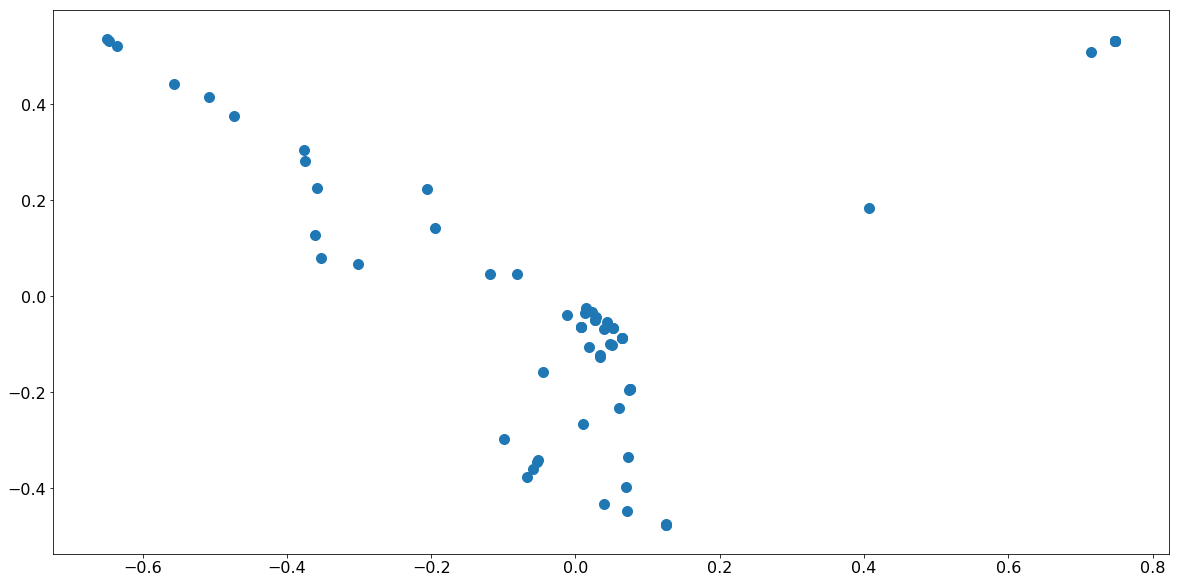

In [28]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(pca_df[0], pca_df[1], s=100)
plt.show()

In [29]:
sum(pca.explained_variance_ratio_)

0.26630986248034644

### The choice of 20 topics was a guess. The end goal is a figure similar to the one above; a 2-D plot that shows how these movies are clustered according to their transcripts using LDA. I didn't just use two topic because I think that it would be more accurate to use a larger number of topics and then use PCA to capture the variance in those larger number of topics.

### So now I want to figure out which number of topics is best for a 2-D representation by seeing which will generate the largest explained varience from 2 principle components. There might be a different number of topics that more accurately represents these documents for other purposes (recommendation engine, classification, etc.) but I'm only concerned here with what is best for my 2-D plot.

In [60]:
exp_vars = []
max_exp_var = 0

for num_topics in range(5,31):
    
    # generate lda topic model
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50)
    
    # use model to create topic model distribution for each doc
    all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
    
    # transform sparse matrix representation to dataframe
    all_topics_csr = gensim.matutils.corpus2csc(all_topics)
    all_topics_numpy = all_topics_csr.T.toarray()
    all_topics_df = pd.DataFrame(all_topics_numpy)
    
    # apply PCA with 2 components
    pca = PCA(n_components=2)
    pca.fit(all_topics_df)
    
    # calculate explained variance
    exp_var = sum(pca.explained_variance_ratio_)
    exp_vars.append(exp_var)
    print(num_topics, exp_var)
    
    if(exp_var > max_exp_var):
        max_exp_var = exp_var
        optimum_num_topics = num_topics
    
    
print('Maximum Explained Variance: {:.3f}'.format(max_exp_var))
print('Optimum Number of LDA topics: {:.3f}'.format(optimum_num_topics))
print(exp_vars)
    

5 0.5858347204055162
6 0.6286096918225217
7 0.6446549615222161
8 0.486294437885574
9 0.44680690548360025
10 0.42523799971841303
11 0.44875866558847544
12 0.4606913636271351
13 0.3434681919319109
14 0.35213781201649363
15 0.31138079396392726
16 0.39969584064995334
17 0.3561515810366247
18 0.36726630024185414
19 0.2810551272349511
20 0.3090514589127933
21 0.4131440223330586
22 0.2796552510010777
23 0.2461827890832879
24 0.3215811130867313
25 0.3127544624462069
26 0.25081254862233093
27 0.24491948488683998
28 0.26256491730715104
29 0.18540169394205847
30 0.26038396549188053
31 0.2723883398521215
32 0.27582682396097413
33 0.20408114823462783
34 0.246842279618797
35 0.23339455243529705
36 0.2685475031663045


KeyboardInterrupt: 

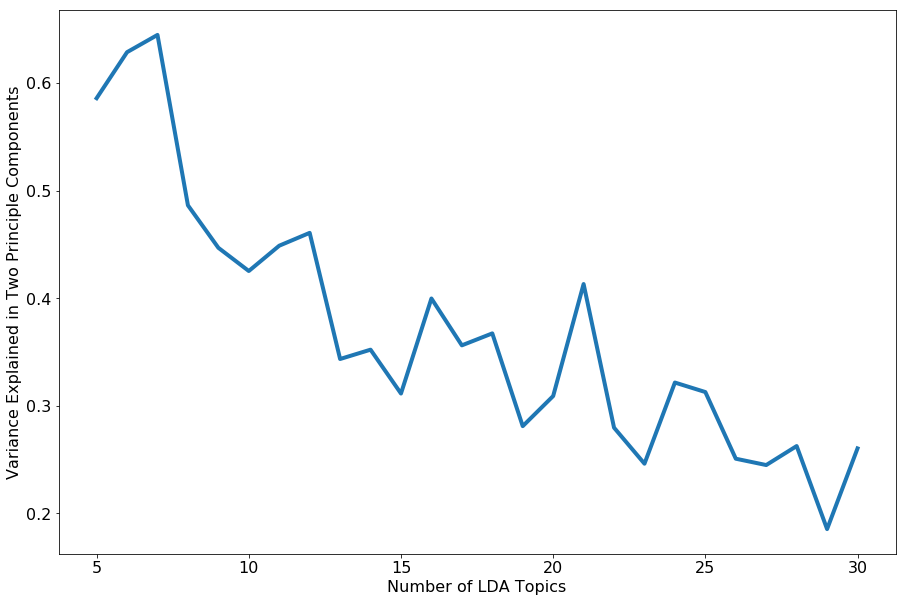

In [66]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of LDA Topics', fontsize=16)
plt.ylabel('Variance Explained in Two Principle Components', fontsize=16)
plt.plot(range(5,31), exp_vars[:26], linewidth = 4)
plt.show()

In [67]:
# generate lda topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=7, id2word=dictionary, passes=50)

# use model to create topic model distribution for each doc
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# transform sparse matrix representation to dataframe
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

# apply PCA with 2 components
pca = PCA(n_components=2)
pca.fit(all_topics_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
pca_df = pd.DataFrame(pca.transform(all_topics_df))
pca_df['titles'] = df['titles']
pca_df['Universe'] = df['Universe']
pca_df

0         1                                             titles  \
0   0.637238 -0.002810                           The Amazing Spider-Man 2   
1   0.717243  0.004528                                            Ant-Man   
2   0.724624  0.007050                               Ant-Man and the Wasp   
3  -0.296510 -0.232246                                       The Avengers   
4  -0.357622 -0.361557                            Avengers: Age of Ultron   
5  -0.258599 -0.327480                                  Avengers: Endgame   
6  -0.380890 -0.246999                             Avengers: Infinity War   
7  -0.205631 -0.078425                                      Black Panther   
8  -0.202320 -0.111011                                              Blade   
9  -0.202321 -0.111012                                           Blade II   
10 -0.254515 -0.187805                                     Blade: Trinity   
11 -0.363473 -0.352351                         Captain America: Civil War   
12 -0.376868 -0.368105                 Captain America: The First Avenger   
13 -0.377124 -0.368201                Captain America: The Winter Soldier   
14 -0.484249  0.708849                              Captain Marvel (2019)   
15 -0.403452 -0.584006                                    Deadpool (film)   
16  0.658483 -0.011556                                         Deadpool 2   
17  0.717435  0.004031                                     Doctor Strange   
18 -0.456669  0.649077                            Guardians of the Galaxy   
19 -0.484955  0.725486                     Guardians of the Galaxy Vol. 2   
20 -0.181157 -0.095142                             Spider-Man: Homecoming   
21  0.724643  0.007052                                           Iron Man   
22 -0.004312 -0.075189                                         Iron Man 2   
23  0.721398  0.006078                                         Iron Man 3   
24 -0.344308  0.320779             LEGO Black Panther: Trouble in Wakanda   
25  0.724191  0.007012             LEGO Marvel Spider-Man: Vexed By Venom   
26 -0.435863  0.697857                           Lego Marvel Super Heroes   
27 -0.439701  0.701262                         Lego Marvel Super Heroes 2   
28 -0.219739  0.058367     Lego Marvel Super Heroes: Avengers Reassembled   
29  0.162337  0.280092         Lego Marvel Super Heroes: Maximum Overload   
..       ...       ...                                                ...   
34 -0.486121  0.728661               Marvel Super Hero Squad (video game)   
35 -0.486228  0.728925     Marvel Super Hero Squad: The Infinity Gauntlet   
36 -0.151721 -0.073471                         Marvel Ultimate Alliance 2   
37  0.125280  0.182091                          Marvel: Ultimate Alliance   
38 -0.486060  0.728511  Marvel’s Guardians of the Galaxy: Mission Brea...   
39  0.724576  0.007046                                         Spider-Man   
40  0.724569  0.007045                                       Spider-Man 3   
41  0.501523 -0.013431                  Spider-Man Unlimited (video game)   
42  0.724630  0.007051                           Spider-Man: Edge of Time   
43 -0.181157 -0.095141                          Spider-Man: Far From Home   
44  0.285252  0.261722                          Spider-Man: Friend or Foe   
45  0.724620  0.007050                  Spider-Man: Into the Spider-Verse   
46  0.724631  0.007051                   Spider-Man: Shattered Dimensions   
47  0.528710 -0.015053                             The Amazing Spider-Man   
48  0.660817 -0.014630                                The Incredible Hulk   
49 -0.397820 -0.580978          The Twilight Saga: Breaking Dawn – Part 1   
50 -0.402237 -0.583323          The Twilight Saga: Breaking Dawn – Part 2   
51 -0.351128 -0.556533                         The Twilight Saga: Eclipse   
52 -0.403447 -0.583997                        The Twilight Saga: New Moon   
53 -0.403453 -0.584009                                               Thor   
54 -0.3

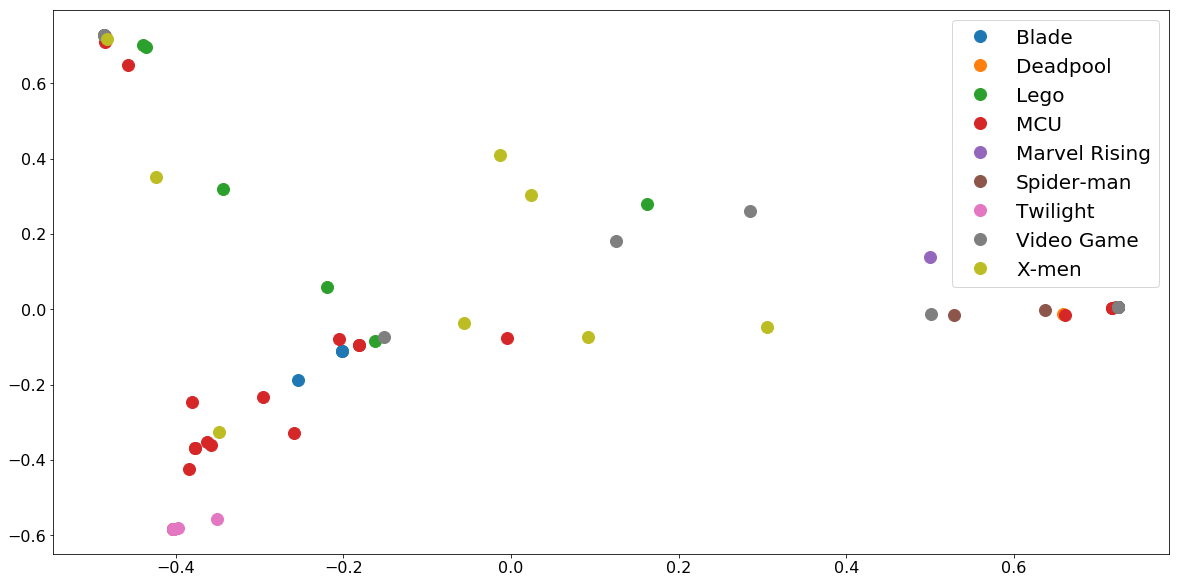

In [74]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.scatter(pca_df[0], pca_df[1], s=100, )
# plt.show()

groups = pca_df.groupby('Universe')
for name, group in groups:
    plt.plot(group[0], group[1], marker="o", linestyle="", label=name, markersize=12)
plt.legend(fontsize=20)

### They're not quite as grouped as I hoped, so lets just see what the same plot looks like when using my original guess of 20 LDA topics

In [35]:
# generate lda topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=50)

# use model to create topic model distribution for each doc
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# transform sparse matrix representation to dataframe
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

# apply PCA with 2 components
pca = PCA(n_components=2)
pca.fit(all_topics_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca_df = pd.DataFrame(pca.transform(all_topics_df))
pca_df['titles'] = df['titles']
pca_df['Universe'] = df['Universe']

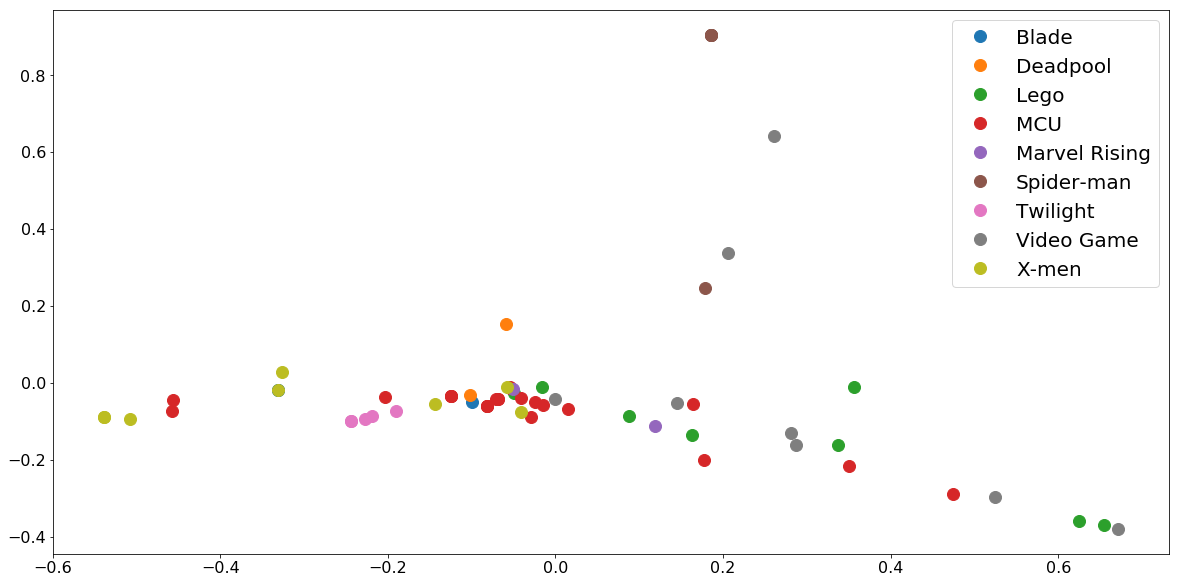

In [37]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.scatter(pca_df[0], pca_df[1], s=100, )
# plt.show()

groups = pca_df.groupby('Universe')
for name, group in groups:
    plt.plot(group[0], group[1], marker="o", linestyle="", label=name, markersize=12)
plt.legend(fontsize=20)

### Subjectively, this is more interesting to me, I like it more.

### But I want more information. I want to see which movies are more similar to each other by this method, but if I just plot all the movie titles next to their points it will get overcrowded. I wanna see the titles on mouse hover. I know it can be done through matplotlib, but I've done it before with plotly, so I'm gonna do that.

In [42]:
# import plotly.plotly as py
import plotly.express as px
# df = px.data.iris()
fig = px.scatter(pca_df, x=0, y=1, color="Universe",
                 hover_data=['titles'])
fig.show()